<a href="https://colab.research.google.com/github/ahanadeb/RL_assignments/blob/main/RL_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import tensorflow as tf
# tf.config.list_physical_devices('GPU')


In [ ]:
# # !cd sample_data
# # !ls
# !cd sample_data/
# !ls

In [ ]:
# !git status

In [62]:
import numpy as np
import matplotlib.pyplot as plt

arrivals= 0.5
low = 1
high = 2
N = 100
gamma = 0.9


def reward (x,a):
  return (-(x/100)**2 - cost(a))

def rate(a):
  if(a == low): #low == 1 
    return 0.51
  elif (a == high): 
    return 0.6  
  else:
    print("??")


def cost(a):
  if(a == low): 
    return 0
  elif (a==high): 
    return 0.01  
  else:
    print("??")

def transition_function_discrete(x,a): ##DISCRETE##

  I = np.random.binomial(1,arrivals,1)
  S = np.random.binomial(1,rate(a),1)
  x_next = x + I - S
  return np.min([N-1, np.max([0, x_next])])

def transition_function_poisson(x,a): ##DISCRETE##

  I = np.random.binomial(1,arrivals,1)
  S = np.random.binomial(1,rate(a),1)
  x_next = x + I - S
  return np.min([N-1, np.max([0, x_next])])

# def transition_function_gaussian(x,a): ##DISCRETE##

#   I = np.random.gaussian(arrivals,1)
#   S = np.random.gaussian(rate(a),1)
#   x_next = x + I - S
#   return np.min([N-1, np.max([0, x_next])])
#   numpy.random.poisson(lam=1.0, size=None)

def transition_function_avg(x,a): ##using the avg probabilities and evaluating over them directly ("easiest")
  I = 0.5
  S = rate(a)
  x_n = x + I - S
  return np.min([N-1, np.max([0, x_n])])

def lazy(x):
  return low


def aggro(x):
  if( x >= 50):
    return high
  else:
    return low

def fine_fm(x,N):
  phi_fine = np.zeros((N+1))
  phi_fine[x] = 1
  return phi_fine


def coarse_fm(x,N):
  phi_coarse = np.zeros(int(N/5))#int to cast to an integer
  for i in range(0,int(N/5)):
    if ( x >= 5*(i-1) ) and ( x <= ( 5*i - 1) ): 
      phi_coarse[i] = 1 
  return phi_coarse


def piecewise_linear_fm(x, N):
    # Compute the first N/5 entries using the coarse_fm function 
    phi = np.array((np.zeros(int(N/5)), np.zeros(int(N/5))))
    phi_coarse = coarse_fm(x, N)[:N//5]
    phi[0] = phi_coarse
    
    # Compute the second N/5 entries using the piecewise linear function
    phi_pwl = np.zeros(N//5)

    for i in range(1, int(N/5)):
        if phi_coarse[i] == 1:           
            phi_pwl[i] = np.abs((x - 5*(i-1) ) /5)
    phi[1] = phi_pwl
  
    return phi





In [64]:
for i in range(0,N):
  if(i<10):
    fine = fine_fm(i,N)
    coarse = coarse_fm(i,N)
    pw_l = piecewise_linear_fm(i, N )
    # print(" \n\n** i :", i,"***", "\nfine\n", fine, "\ncoarse\n", coarse ,"\npw_linear\n", pw_l)
    print(" \n\n** i :", i,"***", "\npw_linear\n", pw_l)

aaaaaaaaaa 0.0
 

** i : 0 *** 
pw_linear
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
aaaaaaaaaa 0.2
 

** i : 1 *** 
pw_linear
 [[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]]
aaaaaaaaaa 0.4
 

** i : 2 *** 
pw_linear
 [[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]]
aaaaaaaaaa 0.6
 

** i : 3 *** 
pw_linear
 [[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]]
aaaaaaaaaa 0.8
 

** i : 4 *** 
pw_linear
 [[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.8 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [ ]:
# 
##Avg probability version
def solve_bellman_m(policy, transfunc, gamma, N):
  # Compute the transition probabilities
  P = np.zeros((N, N))
  for x in range(N):
    for x_prime in range(N):
      P[x_prime, x] = transfunc(x, policy(x))

  # Compute the reward vector
  r = np.zeros(N)
  for x in range(N):
    r[x] = reward(x, policy(x))

  # Solve the Bellman equation
  V = np.linalg.inv(np.eye(N) - gamma * P) @ r

  return V


# for i in range(0,N):
#  transition_function_poisson(x,a): ##DISCRETE##


Now as for TD(0): 



In [ ]:
N = 100
##hyperparameters:
a = 1e5
b = 1e5 ##try different ones
t = 1 ##every timestep in markov is of 1?
alfa_t = a / (t + b) ##~0.2
gamma = 0.9


def td_zero(policy, episodes):
  V = np.zeros((N))
  actions = np.array([1,2])
  S = 99 ##Start with full queue
  V_1e4 = V
  V_1e5 = V
  V_1e6 = V

  for steps in range(0,episodes):
    # print("DBG1", steps)
    if (steps==1E4):
      print("\n\n\n************** YES 1e4 *****************\n\n")
      V_1e4 = V
    elif (steps == 1E5):
      print("\n\n************** YES 1e5 *****************\n\n")
      V_1e5 = V
    elif (steps == 1E6):
      print("\n\n************** YES 1e6 *****************\n\n")
      V_1e6 = V

    alfa_t = a / (steps + b) ##~0.2
    S = 99 ##Start with full queue 
    n_iter = 0
    cont = True
    while cont == True: 
      n_iter += 1
      V_old = V[S]
      # S_next = transition_function_avg(S,policy(S))   ##we truncate to an integer value, maybe use the feature maps here in the future!! TODO 
      S_next = int(transition_function_avg(S,policy(S)))   ##we truncate to an integer value, maybe use the feature maps here in the future!! TODO 
      reward_ = reward(S,policy(S))                 
      V[S] = V_old + (alfa_t * (reward_ + gamma * V[S_next] - V[S])) 
      S = S_next
      if(S == 0):
        # print("DBG2", n_iter)
        cont = False
        break
    ##until S is terminal, but what is a terminal state in this environment???
  return V, V_1e4, V_1e5, V_1e6
  


Streaming output truncated to the last 5000 lines.
DBG2 99
DBG1 997503
DBG2 99
DBG1 997504
DBG2 99
DBG1 997505
DBG2 99
DBG1 997506
DBG2 99
DBG1 997507
DBG2 99
DBG1 997508
DBG2 99
DBG1 997509
DBG2 99
DBG1 997510
DBG2 99
DBG1 997511
DBG2 99
DBG1 997512
DBG2 99
DBG1 997513
DBG2 99
DBG1 997514
DBG2 99
DBG1 997515
DBG2 99
DBG1 997516
DBG2 99
DBG1 997517
DBG2 99
DBG1 997518
DBG2 99
DBG1 997519
DBG2 99
DBG1 997520
DBG2 99
DBG1 997521
DBG2 99
DBG1 997522
DBG2 99
DBG1 997523
DBG2 99
DBG1 997524
DBG2 99
DBG1 997525
DBG2 99
DBG1 997526
DBG2 99
DBG1 997527
DBG2 99
DBG1 997528
DBG2 99
DBG1 997529
DBG2 99
DBG1 997530
DBG2 99
DBG1 997531
DBG2 99
DBG1 997532
DBG2 99
DBG1 997533
DBG2 99
DBG1 997534
DBG2 99
DBG1 997535
DBG2 99
DBG1 997536
DBG2 99
DBG1 997537
DBG2 99
DBG1 997538
DBG2 99
DBG1 997539
DBG2 99
DBG1 997540
DBG2 99
DBG1 997541
DBG2 99
DBG1 997542
DBG2 99
DBG1 997543
DBG2 99
DBG1 997544
DBG2 99
DBG1 997545
DBG2 99
DBG1 997546
DBG2 99
DBG1 997547
DBG2 99
DBG1 997548
DBG2 99
DBG1 997549
DBG2 99
D

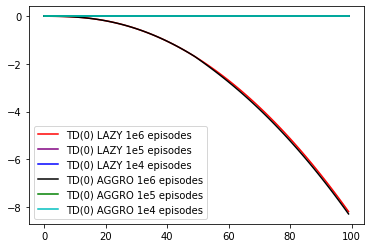

In [ ]:
##useful variables to store nº of episodes:
##LAZY:
Y1, Y2, Y3, Y4 = td_zero(lazy, 10**5) ## Y1 is full iterations, Y2-4 is from 10^4 to 10^6 

##AGGRO:
Y5, Y6, Y7, Y8 = td_zero(aggro, 10**5)  ##Y4 for full iterations, Y5-7 for 10^4 to 10^6

##THIS TAKES A LONG TIME TO RUN...

X = np.arange(100)

##order is: Y1 = 10^6 steps, Y2 = 10^5, Y3 = 10^4


import matplotlib.pyplot as plt
plt.plot(X,Y1, color='red', label='TD(0) LAZY all episodes')
plt.plot(X,Y2, color='purple', label='TD(0) LAZY 1e4 episodes')
plt.plot(X,Y3, color='blue', label='TD(0) LAZY 1e5 episodes')
plt.plot(X,Y4, color='yellow', label='TD(0) LAZY 1e6 episodes')

plt.legend()
plt.show()

plt.plot(X,Y5, color='k', label='TD(0) AGGRO all episodes')
plt.plot(X,Y6, color='g', label='TD(0) AGGRO 1e4 episodes')
plt.plot(X,Y7, color='c', label='TD(0) AGGRO 1e5 episodes')
plt.plot(X,Y8, color='b', label='TD(0) AGGRO 1e6 episodes')

plt.legend()
plt.show()

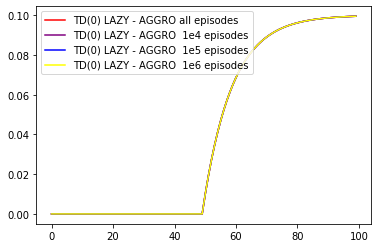

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,Y1 - Y5, color='red', label='TD(0) LAZY - AGGRO all episodes')
plt.plot(X,Y2 - Y6, color='purple', label='TD(0) LAZY - AGGRO  1e4 episodes')
plt.plot(X,Y3 - Y7, color='blue', label='TD(0) LAZY - AGGRO  1e5 episodes')
plt.plot(X,Y4 - Y8, color='yellow', label='TD(0) LAZY - AGGRO  1e6 episodes')

plt.legend()
plt.show()


Which looks straightforward similar to what we saw during Homework 1. Now, if we use the feature maps:  


In [ ]:
def td_zero_FM(policy, episodes, femapFM):
  V = np.zeros((N))
  V_1e4_fm = V
  V_1e5_fm = V
  V_1e6_fm = V
  actions = np.array([1,2])
  S = 99 ##Start with full queue

  for steps in range(0,episodes):
    if (steps==1E4):
      print("\n\n\n************** YES 1e4 *****************\n\n")
      V_1e4_fm = V
    elif (steps == 1E5):
      print("\n\n************** YES 1e5 *****************\n\n")
      V_1e5_fm = V 
    elif (steps == 1E6):
      print("\n\n************** YES 1e6 *****************\n\n")
      V_1e6_fm = V   

    S = 99
    alfa_t = a / (steps + b) ##~0.2 and make it decrease with number of iterations
    feature_vector = femapFM(S,N)
    V_old = V[S]

    cont = True
    while cont: 
    # S_next = transition_function_avg(S,policy(S))   ##we truncate to an integer value, maybe use the feature maps here in the future!! TODO 
      S_next = int(transition_function_avg(S,policy(S)))   ##we truncate to an integer value, maybe use the feature maps here in the future!! TODO 
      next_feature_vector = femapFM(S_next,N)
      reward_ = reward(S,policy(S))                 
      V_next = solve_bellman_m(policy, transition_function_avg, gamma, N)
      td_error = reward + gamma * V[next_state] - V[state]
      V[S] += alfa_t * td_error * np.dot(feature_vector, feature_map(state))

      # V[S] = V_old + (alfa_t * (reward_ + gamma * V_next[S_next] - V[S])) 
      
      S = S_next
      if(S ==0):
        cont = False
        break
    ##until S is terminal
  return V, V_1e4_fm, V_1e5_fm, V_1e6_fm



In [ ]:
##AGGRO TD0 using feature matrix and PLOTS
V_FM, V4F_FM, V5F_FM, V6F_FM = td_zero_FM(aggro, 10**5, fine_fm)

plt.plot(X,V_FM, color='red', label='TD(0) FINE AGGRO all episodes')
plt.plot(X,V4F_FM, color='purple', label='TD(0) FINE AGGRO 1e4 episodes')
plt.plot(X,V5F_FM, color='blue', label='TD(0) FINE AGGRO 1e5 episodes')
plt.plot(X,V6F_FM, color='yellow', label='TD(0) FINE AGGRO 1e6 episodes')
plt.legend()
plt.show()


TypeError: ignored

In [ ]:
##COARSE MATRIX TD0:

V_C, V4C_FM, V5C_FM, V6C_FM = td_zero_FM(aggro, 1e5, coarse_fm)

plt.plot(X,V_C, color='red', label='TD(0) COARSE AGGRO all episodes')
plt.plot(X,V4C_FM, color='purple', label='TD(0) COARSE AGGRO 1e4 episodes')
plt.plot(X,V5C_FM, color='blue', label='TD(0) COARSE AGGRO 1e5 episodes')
plt.plot(X,V6C_FM, color='yellow', label='TD(0) COARSE AGGRO 1e6 episodes')
plt.legend()
plt.show()



In [ ]:
##PIECEWISE LINEAR FEATURE MAP TD0: 
V_PW, V4PW_FM, V5PW_FM, V6PW_FM  = td_zero_FM(aggro, 1e5, piecewise_linear)



In [ ]:
##LAZY TD0 using feature matrix and PLOTS

V_td0_lazy_fine_fm, Y2, Y3, Y4 = td_zero_FM(lazy, 1e6, fine_fm)
V_td0_lazy_coarse_fm = td_zero_FM(lazy, 1e6, coarse_fm)
V_td0_lazy_pw_fm = td_zero_FM(lazy, 1e6, piecewise_linear)


plt.plot(X,V_C, color='red', label='TD(0) COARSE AGGRO all episodes')
plt.plot(X,V4C_FM, color='purple', label='TD(0) COARSE AGGRO 1e4 episodes')
plt.plot(X,V5C_FM, color='blue', label='TD(0) COARSE AGGRO 1e5 episodes')
plt.plot(X,V6C_FM, color='yellow', label='TD(0) COARSE AGGRO 1e6 episodes')
plt.legend()
plt.show()


In [ ]:
##And plot everything:




# V_td0_aggro_fine1 = td_zero_FM(aggro, 10**4, fine_fm)
# V_td0_aggro_coarse1 = td_zero_FM(lazy, 10**4, coarse_fm)
# V_td0_aggro_pw1 = td_zero_FM(lazy, 10**4, piecewise_linear)

Y1 = V_td0_aggro_fine1
Y2 = V_td0_aggro_coarse1
Y3 = V_td0_aggro_pw1

Y1_ = V_td0_aggro_fine2
Y2_ = V_td0_aggro_coarse2
Y3_ = V_td0_aggro_pw2

Y1__ = V_td0_aggro_fine3
Y2__ = V_td0_aggro_coarse3
Y3__ = V_td0_aggro_pw3

X = np.arange(100)


import matplotlib.pyplot as plt
plt.plot(X,Y1, color='red', label='TD(0) aggro using FINE feature map 10^4 iterations')
plt.plot(X,Y2, color='purple', label='TD(0) aggro using COARSE feature map 10^4 iterations')
plt.plot(X,Y3, color='blue', label='TD(0) aggro using PIECEWISE feature map 10^4 iterations')

# plt.plot([4, 6, 8], color='blue', label='line two')
plt.legend()
plt.show()

In [ ]:
# fine_fm(x,N):
#   phi_fine = np.zeros((N+1))
#   phi_fine[x] = 1
#   return phi_fine


# def coarse_fm(x,N):
#   phi_coarse = np.zeros(int(N/5))#int to cast to an integer
#   for i in range(0,int(N/5)):
#     if ( x >= 5*(i-1) ) and ( x <= ( 5*i - 1) ): 
#       phi_coarse[i] = 1 
#   return phi_coarse


# def piecewise_linear_fm(x, N):
#     # Compute the first N/5 entries using the coarse_fm function 
#     phi = np.array((np.zeros(int(N/5)), np.zeros(int(N/5))))
#     phi_coarse = coarse_fm(x, N)[:N//5]
#     phi[0] = phi_coarse
    
#     # Compute the second N/5 entries using the piecewise linear function
#     phi_pwl = np.zeros(N//5)
#     for i in range(1, int(N/5)):
#         if phi_coarse[i-1] == 1:           
#             phi_pwl[i-1] = 1*(x - 5*(i-1) )/ 5
    
#     phi[1] = phi_pwl
  
    return phi

In [ ]:
def run_td_0(env, feature_map, gamma=0.9, alpha=0.1, num_episodes=100):
    states = env.states
    actions = env.actions
    value_function = initialize_value_function(states)
    
    for episode in range(num_episodes):
        state = env.reset()
        feature_vector = feature_map(state)
        
        while True:
            action = np.random.choice(actions)
            next_state, reward, done, _ = env.step(action)
            next_feature_vector = feature_map(next_state)
            
            td_error = reward + gamma * value_function[next_state] - value_function[state]
            value_function[state] += alpha * td_error * np.dot(feature_vector, feature_map(state))
            
            state = next_state
            feature_vector = next_feature_vector
            
            if S <= 1:
              break
    
    return value_function



In [ ]:
# N = 100
# x = 21
# i_dx = int(x/5)
# print(i_dx)

# phi_pw = np.array((np.zeros(int(N/5)), np.zeros(int(N/5))))
# phi_pw[0][i_dx] = 1 ##One if it's part of the integer
# phi_pw[1][8:20] = 1 ##One if it's part of the integer
# print("phi0:", phi_pw[0])

# print("phi1:", phi_pw[1])



In [ ]:
# ##"trash"

# import numpy as np

# def feature_map(state, N):
#     # One-hot encoding
#     feature = np.zeros(N)
#     feature[state] = 1
#     return feature


# import numpy as np

# def step(state, action):
#     # Define the parameters of the system
#     p = 0.5  # Arrival rate
#     q = [0.1, 0.2]  # Service rates for actions 0 and 1
#     N = 100  # Maximum queue length

#     # Determine the increment and decrement
#     It = np.random.binomial(1, p)
#     St = np.random.binomial(1, q[action])

#     # Update the state
#     next_state = int(np.clip(state + It - St, 0, N - 1))

#     # Calculate the reward
#     if next_state == 0:
#         reward = 0
#     else:
#         reward = -1

#     # Determine if the episode is terminated
#     done = (next_state == 0)

#     return next_state, reward, done


# def TD_zero(state, alpha, gamma, weights, N):
#     # Define the parameters of the system
#     actions = [0, 1]
#     q = [0.1, 0.2]  # Service rates for actions 0 and 1

#     # Choose an action using an epsilon-greedy policy
#     epsilon = 0.1
#     if np.random.uniform() < epsilon:
#         action = np.random.choice(actions)
#     else:
#         values = [np.dot(feature_map(state, N), weights[a]) for a in actions]
#         action = actions[np.argmax(values)]

#     # Take a step in the environment
#     next_state, reward, done = step(state, action)

#     # Update the weights using TD(0)
#     delta = reward + gamma * np.dot(feature_map(next_state, N), weights[action]) - np.dot(feature_map(state, N), weights[action])
#     weights[action] += alpha * delta * feature_map(state, N)

#     return next_state, done, weights
